In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
# 데이터 로드
digits = datasets.load_digits()
X = digits.images.reshape(len(digits.images), -1)  # (n_samples, 64)
y = digits.target.reshape(-1, 1)                   # (n_samples, 1)

# One-hot Encoding
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [11]:
model = Sequential()
model.add(Dense(64, input_shape=(64,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 0~9 숫자 = 클래스 10개

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 6,570
Trainable params: 6,570
Non-trainable params: 0
_________________________________________________________________


In [12]:
N_EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=N_EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1)

Epoch 1/30
45/45 [==============================] - 1s 5ms/step - loss: 2.5879 - accuracy: 0.3090 - val_loss: 1.1559 - val_accuracy: 0.5944
Epoch 2/30
45/45 [==============================] - 0s 2ms/step - loss: 0.8171 - accuracy: 0.7481 - val_loss: 0.4473 - val_accuracy: 0.8833
Epoch 3/30
45/45 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8970 - val_loss: 0.2415 - val_accuracy: 0.9361
Epoch 4/30
45/45 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9395 - val_loss: 0.2204 - val_accuracy: 0.9472
Epoch 5/30
45/45 [==============================] - 0s 3ms/step - loss: 0.1528 - accuracy: 0.9541 - val_loss: 0.1481 - val_accuracy: 0.9667
Epoch 6/30
45/45 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9680 - val_loss: 0.1361 - val_accuracy: 0.9639
Epoch 7/30
45/45 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 0.9763 - val_loss: 0.1130 - val_accuracy: 0.9750
Epoch 8/30
45/45 [==

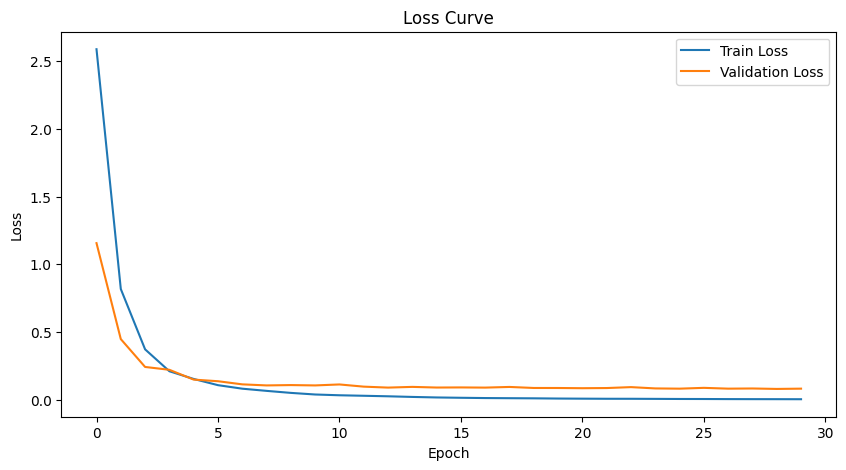

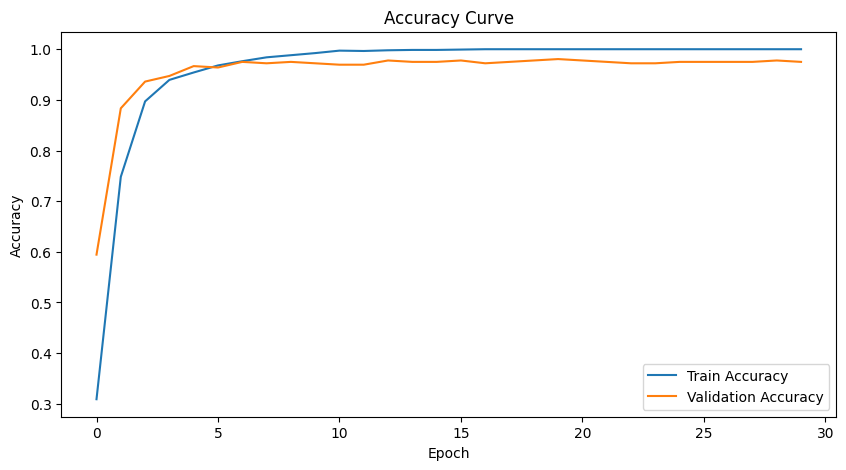

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.show()

In [14]:
# 예측값 변환
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

12/12 [==============================] - 0s 1ms/step


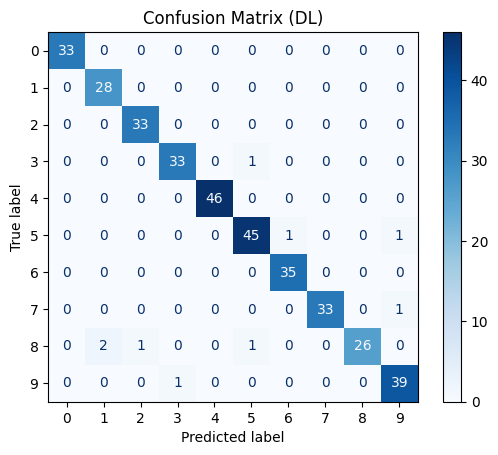

Classification Report (DL):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.87      0.93        30
           9       0.95      0.97      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



In [15]:
# 혼동 행렬 시각화
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (DL)")
plt.show()

# 분류 리포트 출력
print("Classification Report (DL):\n")
print(classification_report(y_true, y_pred))